In [ ]:

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import seaborn as sns
import pandas as pd
from torchsummary import summary
import torch.nn.functional as F # functions like convolution, attention , F.relu etc.

/tmp/ipython-input-2372076984.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
i = np.array([8,5,-4])
w = np.array([0.5,0.3,0.2])
o = np.sign(i.dot(w)) #non linear sgn function

4.7


# Linear regression

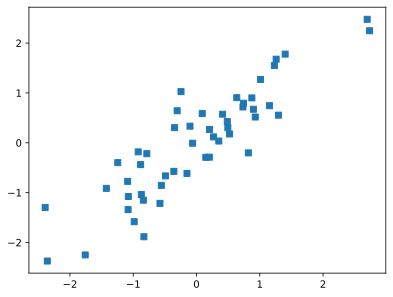

In [ ]:
#create data
N = 50
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2
plt.plot(x,y,'s')
plt.show()

In [ ]:
#build model
ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    #nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
#learning rate
learningRate = 0.05

#loss function
lossfun = nn.MSELoss()

#optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate )
#https://docs.pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [ ]:
#train the model
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  #forward pass
  yHat = ANNreg(x)

  #compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad() #initialize all gradients to 0
  loss.backward() #backprop based on losses
  optimizer.step() #housekeeping functions of SGD

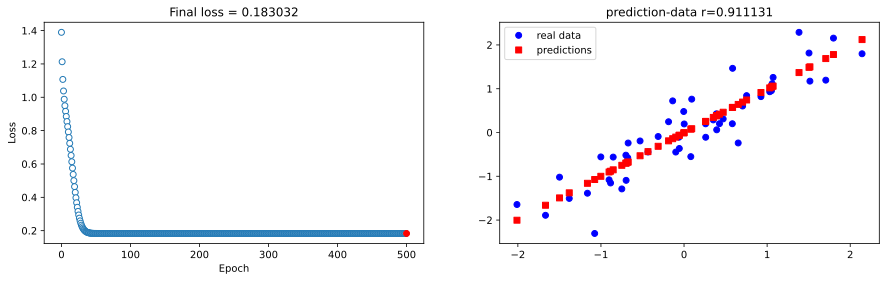

In [ ]:
#show the losses

#manually compute losses
#final forward pass
predictions = ANNreg(x)

#final loss (MSE)
testloss = (predictions - y).pow(2).mean()

fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].plot(losses.detach(),'o',markerfacecolor = 'w',linewidth = 0.1)
ax[0].plot(numepochs,testloss.detach(),'ro') #detach isolates loss value from gradient in output #testloss.item() returns scalar instead of tensor
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Final loss = %g' %testloss.item())

ax[1].plot(x,y,'bo',label = 'real data')
ax[1].plot(x,predictions.detach(),"rs", label = "predictions")
ax[1].set_title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:2f}')
ax[1].legend()

plt.show()


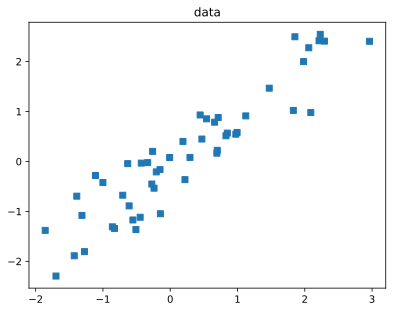

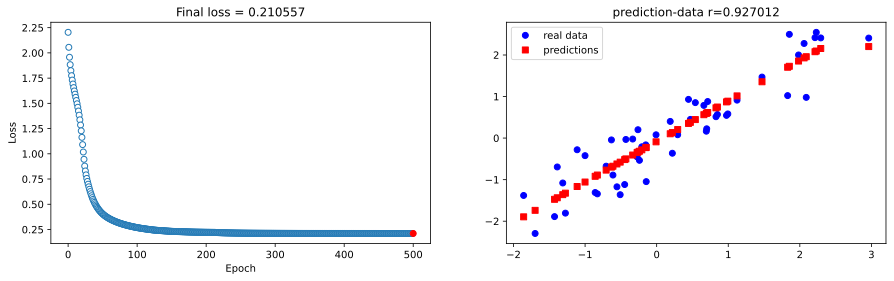

In [ ]:
def build_train_model(x,y,learningRate = 0.05, numepochs = 500):

  #build the model
  ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation function
    nn.Linear(1,1) #output layer
    )

  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr = learningRate )
  losses = torch.zeros(numepochs)

  #train the model
  for epochi in range(numepochs):
    #forward pass
    yHat = ANNreg(x)

    #compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad() #initialize all gradients to 0
    loss.backward() #backprop based on losses
    optimizer.step() #housekeeping functions of SGD

  #final predictions and losses
  predictions = ANNreg(x)
  testloss = (predictions - y).pow(2).mean() #MSE

  return predictions,testloss,losses

def visualize_results (x,y,losses,testloss,predictions,numepochs=500):
  fig,ax = plt.subplots(1,2,figsize=(15,4))
  ax[0].plot(losses.detach(),'o',markerfacecolor = 'w',linewidth = 0.1)
  ax[0].plot(numepochs,testloss.detach(),'ro') #detach isolates loss value from gradient in output #testloss.item() returns scalar instead of tensor
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Final loss = %g' %testloss.item())

  ax[1].plot(x,y,'bo',label = 'real data')
  ax[1].plot(x,predictions.detach(),"rs", label = "predictions")
  ax[1].set_title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:2f}')
  ax[1].legend()

  plt.show()

def create_data(sample_size=50,slope = 1,visualize = 'no'):
  N = sample_size
  x = torch.randn(N,1)
  y = slope*x + torch.randn(N,1)/2

  if visualize =='yes':
    plt.plot(x,y,'s')
    plt.title("data")
    plt.show()
  return x,y


x,y = create_data(sample_size=50,slope = 1,visualize = 'yes')
predictions2,testloss2,losses2 = build_train_model(x,y)
visualize_results(x,y,losses2,testloss2,predictions2)

/tmp/ipython-input-1281382770.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  results[i,:]= mi,testloss.detach(),corr_ceff


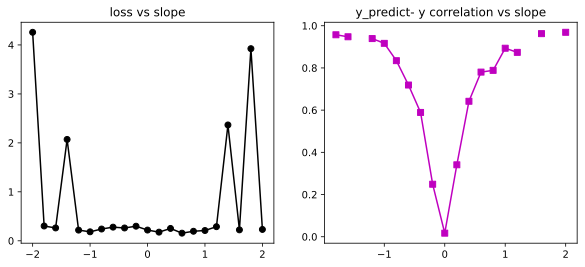

In [ ]:
m= np.linspace(-2,2,21)
results = np.zeros((len(m),3))
for i,mi in enumerate(m):
  x,y = create_data(sample_size=50,slope = mi)
  predictions,testloss,losses = build_train_model(x,y)
  corr_ceff = np.corrcoef(y.T,predictions.detach().T)[0,1]
  results[i,:]= mi,testloss.detach(),corr_ceff

fig,ax = plt.subplots(1,2,figsize = (10,4))
ax[0].plot(results[:,0],results[:,1],'ko-',label = "loss")
ax[0].set_title("loss vs slope")
ax[1].plot(results[:,0],results[:,2],'ms-',label = "correlation")
ax[1].set_title("y_predict- y correlation vs slope")
plt.show()
#losses are high due to lack of normalization

# Binary classification

Architecture :

 x1, x2 -> Linear unit -> ReLU -> Linear unit -> Sigmoid activation

 loss function = cross entropy

 Sigmoid function R-> R[0,1]

 https://en.wikipedia.org/wiki/Sigmoid_function

In [ ]:
# Numerical stability of sigmoid function
def sigmoid(x):
  return (1/(1+np.exp(-x)))

def one_minus_sigmoid(x):
  return (np.exp(-x)/(1+np.exp(-x)))

print(sigmoid(-750)) #overflow warning
print(one_minus_sigmoid(-750)) #nan
print(1 - sigmoid(-750))
print()

#https://www.programmersought.com/article/82853482956/

0.0
nan
1.0



/tmp/ipython-input-2469300882.py:8: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))
/tmp/ipython-input-2469300882.py:11: RuntimeWarning: overflow encountered in exp
  return (np.exp(-x)/(1+np.exp(-x)))
/tmp/ipython-input-2469300882.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return (np.exp(-x)/(1+np.exp(-x)))


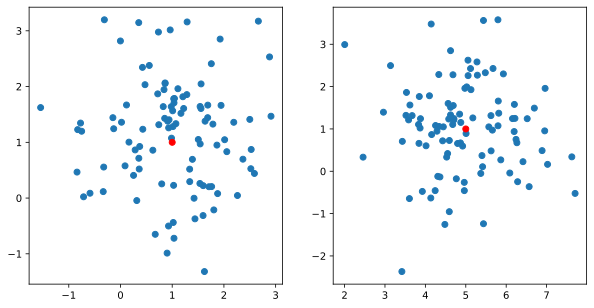

In [ ]:
#create data
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

a = [A[0] + np.random.randn (nPerClust)*blur,A[1] + np.random.randn (nPerClust)*blur]
b = [B[0] + np.random.randn (nPerClust)*blur,B[1] + np.random.randn (nPerClust)*blur]

## true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

#concatenate into matrix
data_np = np.hstack((a,b)).T

##convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig,ax = plt.subplots(1,2,figsize = [10,5])
ax[0].scatter(a[0],a[1])
ax[0].plot(A[0],A[1],'ro')
ax[1].scatter(b[0],b[1])
ax[1].plot(B[0],B[1],'ro')

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1, 1),
    nn.Sigmoid())

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
#other model features
learning_rate = 0.01

#loss function
#lossfun = nn.CrossEntropyLoss()
lossfun = nn.BCELoss()
#BCEwithLogitsLoss implements sigmoid function internally and is more numerically stable than other loss functions

#Optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

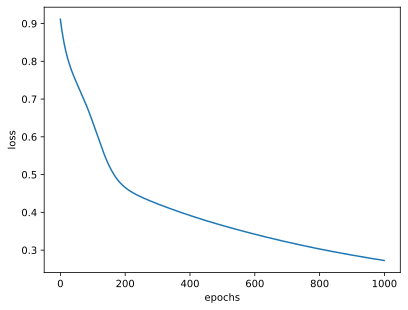

In [ ]:
#train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  #step1 - forward pass
  yhat = ANNclassify(data)

  #step2 - compute the loss
  loss = lossfun(yhat,labels)
  losses[epochi] = loss

  #step3 - backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

##plot the losses
plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
##compute the predictions

#final forward pass
predictions = ANNclassify(data)
predlabels = predictions >0.5

#finderrors
misclassified = np.where(predlabels!=labels)[0]

#totalaccuracy
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)
print(f"final accuracy is {totalacc}")

final accuracy is 93.0


In [ ]:
data[misclassified]

tensor([[ 4.0880,  1.7035],
        [ 2.7487, -0.1308],
        [ 2.4889,  0.3577],
        [ 2.8512,  1.4640],
        [ 2.2843, -0.5414],
        [ 2.7778,  0.5951],
        [ 3.6137,  2.2901],
        [ 2.3952,  0.4859],
        [ 2.2775,  0.0212],
        [ 2.9604,  1.3469],
        [ 2.7583,  0.2161],
        [ 2.3497, -1.3895],
        [ 2.4727, -1.2549],
        [ 2.2871, -0.1523]])

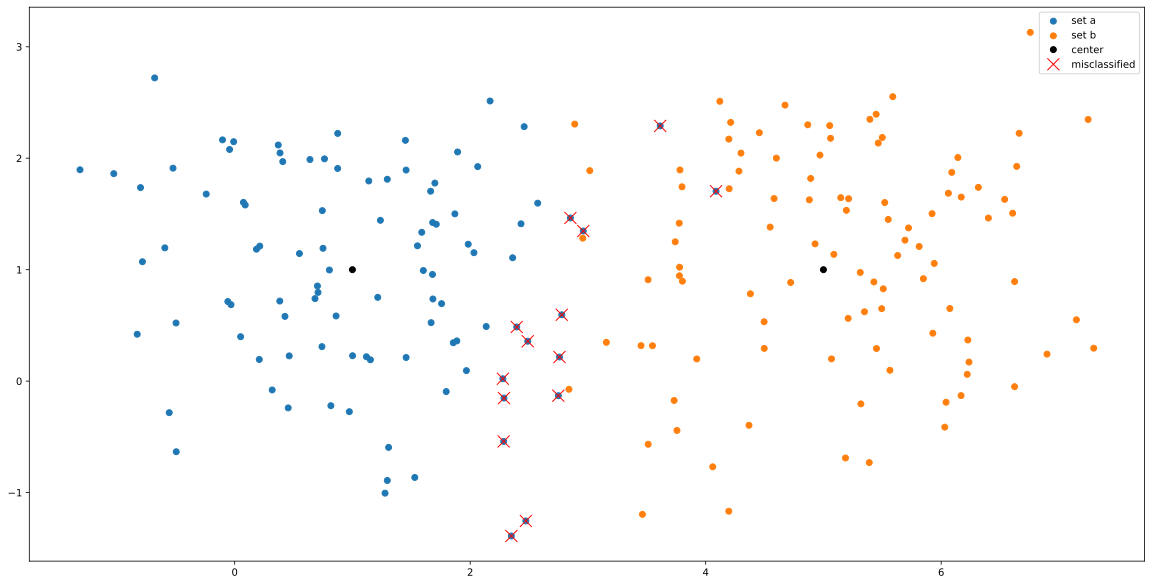

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(a[0],a[1],label = "set a")
plt.scatter(b[0],b[1],label = "set b")
plt.plot(A[0],A[1],"ko",label = "center")
plt.plot(B[0],B[1],"ko")
plt.plot(data[misclassified][:,0],data[misclassified][:,1],"rx",label = "misclassified",markersize = 12)
plt.legend()
plt.show()

In [ ]:
torch.save(ANNclassify.state_dict(), "ANNclassify.pth")
print("Saved PyTorch Model State to ANNclassify.pth")

Saved PyTorch Model State to ANNclassify.pth


# Refactoring code into callable functions

final accuracy % tensor(51.5000)


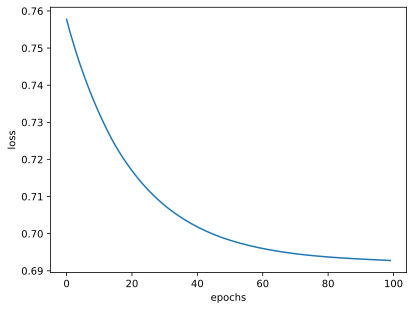

In [ ]:
def createANNmodel(learning_rate = 0.01):

  ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1, 1),
    ##nn.Sigmoid() using BCEwithLogitLoss that autoapplies the sigmoid
  )

  #loss function
  lossfun = nn.BCEWithLogitsLoss()

  #Optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

  return ANNclassify,lossfun,optimizer

def model_training(ANNclassify,lossfun,optimizer,data,labels,numepochs = 1000 ):
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
    #step1 - forward pass
    yhat = ANNclassify(data)

    #step2 - compute the loss
    loss = lossfun(yhat,labels)
    losses[epochi] = loss

    #step3 - backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass
  predictions = ANNclassify(data)

  #compute total accuracy
  totalacc = 100*torch.mean(((predictions>0)== labels).float())

  return losses,predictions,totalacc

ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = 0.1)
losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = 100)
print("final accuracy %",totalacc)
##plot the losses
plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Parametric experiment - learning rate

Testing model performance on a range of learning rates

In [ ]:
## set of learning rates
learningrates = np.linspace(0.001,0.1,40)

## epochs
numepochs = 1000

## initialize output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

## loop through learning rates
for i,lr in enumerate(learningrates):
  ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = lr)
  losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = numepochs)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

/tmp/ipython-input-1861874790.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


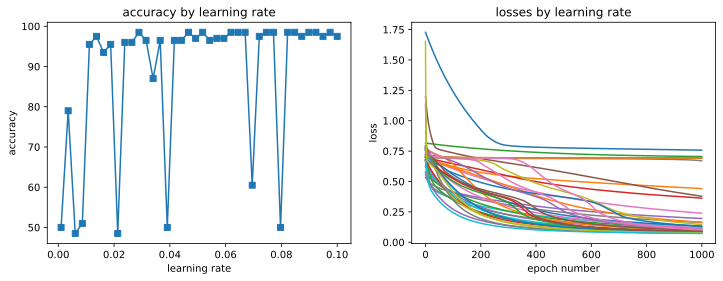

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(learningrates,accByLR,"s-")
ax[0].set_title("accuracy by learning rate")
ax[0].set_xlabel("learning rate")
ax[0].set_ylabel("accuracy")

ax[1].plot(allLosses.T)
ax[1].set_title("losses by learning rate")
ax[1].set_xlabel("epoch number")
ax[1].set_ylabel("loss")
plt.show()

In [ ]:
#proportion of experiment runs where the model had atleast 70%
sum(torch.tensor( accByLR)>70)*100/len(accByLR)

tensor(82.5000)

Detailed experiment to get more comprehensive view of learning rate

In [ ]:
# number of times to iterate through an experiment
numExps = 50

# matrix to store results
accMeta = np.zeros ((numExps,len(learningrates)))

#epochs (reducing to 500)
numepochs = 500

# experiment
for expi in range(numExps):
  for i,lr in enumerate(learningrates):

    ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = lr)
    losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = numepochs)
    accMeta[expi,i] = totalacc

Text(0, 0.5, 'accuracy averaged over 50 experiments')

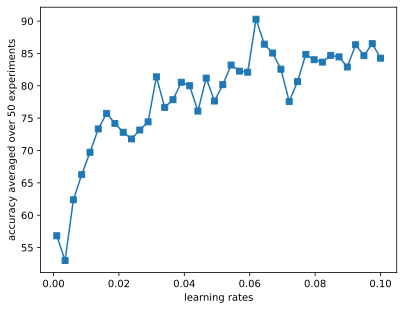

In [ ]:
avg_accuracy = accMeta.mean(axis=0)
plt.plot(learningrates,avg_accuracy,'s-')
plt.xlabel("learning rates")
plt.ylabel("accuracy averaged over 50 experiments")

#Adding hidden layers

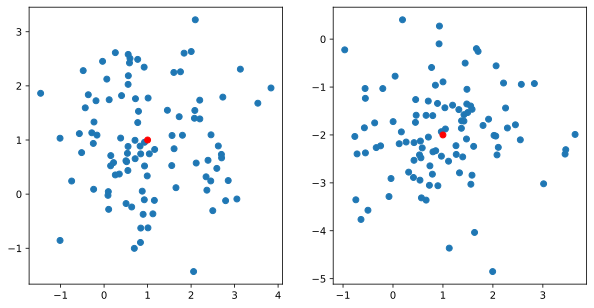

In [ ]:
#create dta
nPerClust = 100
blur = 1

A = [1,1]
B = [1,-2]

a = [A[0] + np.random.randn (nPerClust)*blur,A[1] + np.random.randn (nPerClust)*blur]
b = [B[0] + np.random.randn (nPerClust)*blur,B[1] + np.random.randn (nPerClust)*blur]

## true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

#concatenate into matrix
data_np = np.hstack((a,b)).T

##convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig,ax = plt.subplots(1,2,figsize = [10,5])
ax[0].scatter(a[0],a[1])
ax[0].plot(A[0],A[1],'ro')
ax[1].scatter(b[0],b[1])
ax[1].plot(B[0],B[1],'ro')

In [ ]:
ANNclassify = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid())

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=1, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
#other model features
learning_rate = 0.01

#loss function
#lossfun = nn.CrossEntropyLoss()
lossfun = nn.BCELoss()
#BCEwithLogitsLoss implements sigmoid function internally and is more numerically stable than other loss functions

#Optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

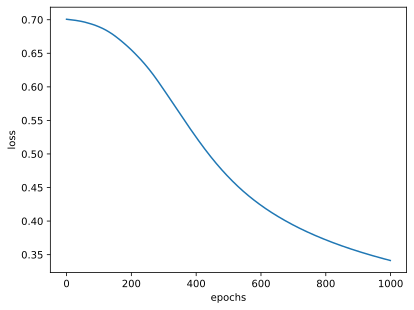

In [ ]:
#train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  #step1 - forward pass
  yhat = ANNclassify(data)

  #step2 - compute the loss
  loss = lossfun(yhat,labels)
  losses[epochi] = loss

  #step3 - backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

##plot the losses
plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
##compute the predictions

#final forward pass
predictions = ANNclassify(data)
predlabels = predictions >0.5

#finderrors
misclassified = np.where(predlabels!=labels)[0]

#totalaccuracy
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)
print(f"final accuracy is {totalacc}")

final accuracy is 90.5


iterating over learning rates

final accuracy % tensor(93.)


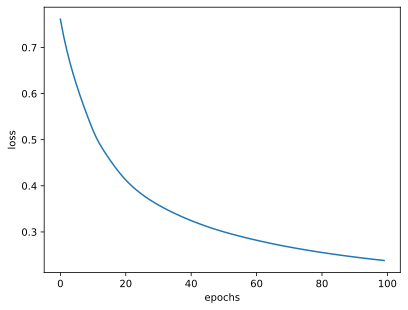

In [ ]:
def createANNmodel(learning_rate = 0.01):

  ANNclassify = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.ReLU(),
    nn.Linear(1,1))

  #loss function
  lossfun = nn.BCEWithLogitsLoss()

  #Optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

  return ANNclassify,lossfun,optimizer

def model_training(ANNclassify,lossfun,optimizer,data,labels,numepochs = 1000 ):
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
    #step1 - forward pass
    yhat = ANNclassify(data)

    #step2 - compute the loss
    loss = lossfun(yhat,labels)
    losses[epochi] = loss

    #step3 - backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass
  predictions = ANNclassify(data)

  #compute total accuracy
  totalacc = 100*torch.mean(((predictions>0)== labels).float())

  return losses,predictions,totalacc

ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = 0.1)
losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = 100)
print("final accuracy %",totalacc)
##plot the losses
plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
## set of learning rates
learningrates = np.linspace(0.001,0.1,40)

## epochs
numepochs = 1000

## initialize output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

## loop through learning rates
for i,lr in enumerate(learningrates):
  ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = lr)
  losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = numepochs)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

/tmp/ipython-input-1861874790.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


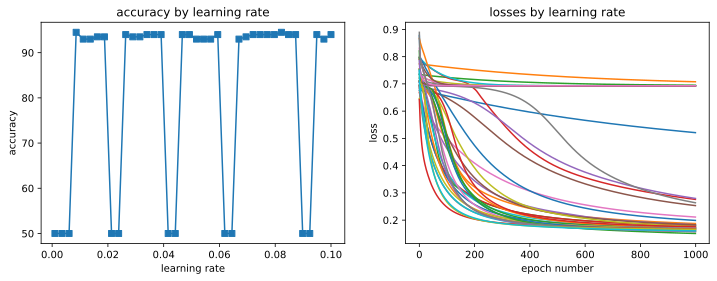

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(learningrates,accByLR,"s-")
ax[0].set_title("accuracy by learning rate")
ax[0].set_xlabel("learning rate")
ax[0].set_ylabel("accuracy")

ax[1].plot(allLosses.T)
ax[1].set_title("losses by learning rate")
ax[1].set_xlabel("epoch number")
ax[1].set_ylabel("loss")
plt.show()

In [ ]:
#proportion of experiment runs where the model had atleast 70%
sum(torch.tensor( accByLR)>70)*100/len(accByLR)

tensor(72.5000)

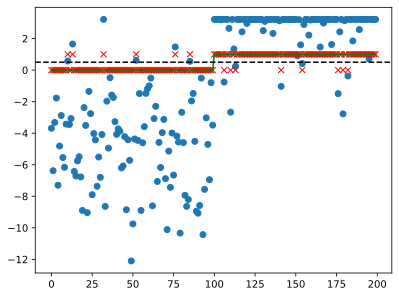

In [ ]:
plt.plot(predictions.detach(),'o')
plt.plot(predictions.detach()>0.5,"rx")
plt.plot(labels,color = "g")
plt.axhline(0.5,linestyle = "--",color = 'k') # Use axhline for a horizontal line
plt.show() # Add plt.show() to display the plot

#Linear models

In [ ]:
#removing non linearities significantly improve performance . This indicates non linear models are not suited for linear problems
def createANNmodel(learning_rate = 0.01):

  ANNclassify = nn.Sequential(
    nn.Linear(2,16),
    #nn.ReLU(),
    nn.Linear(16, 1),
    #nn.ReLU(),
    nn.Linear(1,1))

  #loss function
  lossfun = nn.BCEWithLogitsLoss()

  #Optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learning_rate)

  return ANNclassify,lossfun,optimizer

def model_training(ANNclassify,lossfun,optimizer,data,labels,numepochs = 1000 ):
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
    #step1 - forward pass
    yhat = ANNclassify(data)

    #step2 - compute the loss
    loss = lossfun(yhat,labels)
    losses[epochi] = loss

    #step3 - backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass
  predictions = ANNclassify(data)

  #compute total accuracy
  totalacc = 100*torch.mean(((predictions>0)== labels).float())

  return losses,predictions,totalacc

ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = 0.1)
losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = 100)
print("final accuracy %",totalacc)
##plot the losses
plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

/tmp/ipython-input-3486399639.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


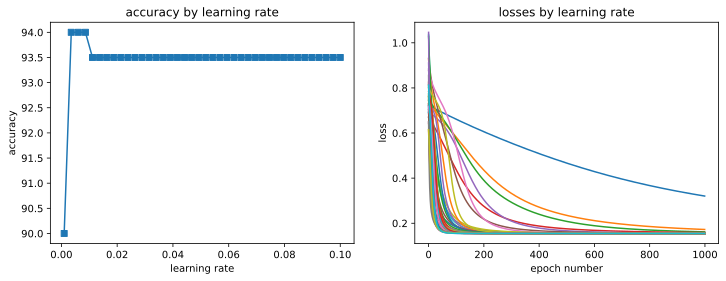

In [ ]:
## set of learning rates
learningrates = np.linspace(0.001,0.1,40)

## epochs
numepochs = 1000

## initialize output
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

## loop through learning rates
for i,lr in enumerate(learningrates):
  ANNclassify,lossfun,optimizer = createANNmodel(learning_rate = lr)
  losses,predictions,totalacc = model_training (ANNclassify,lossfun,optimizer,data,labels,numepochs = numepochs)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(learningrates,accByLR,"s-")
ax[0].set_title("accuracy by learning rate")
ax[0].set_xlabel("learning rate")
ax[0].set_ylabel("accuracy")

ax[1].plot(allLosses.T)
ax[1].set_title("losses by learning rate")
ax[1].set_xlabel("epoch number")
ax[1].set_ylabel("loss")
plt.show()

final accuracy is 93.5


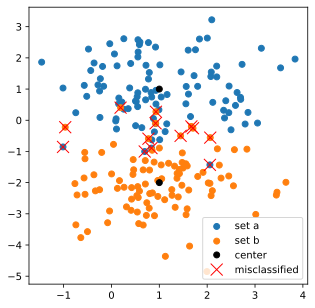

In [ ]:
##compute the predictions

#final forward pass
predictions = ANNclassify(data)
predlabels = predictions >0.5

#finderrors
misclassified = np.where(predlabels!=labels)[0]

#totalaccuracy
totalacc = 100 - 100*len(misclassified)/(2*nPerClust)
print(f"final accuracy is {totalacc}")

plt.figure(figsize = (5,5))
plt.scatter(a[0],a[1],label = "set a")
plt.scatter(b[0],b[1],label = "set b")
plt.plot(A[0],A[1],"ko",label = "center")
plt.plot(B[0],B[1],"ko")
plt.plot(data[misclassified][:,0],data[misclassified][:,1],"rx",label = "misclassified",markersize = 12)
plt.legend()
plt.show()

#Multi-output ANN

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


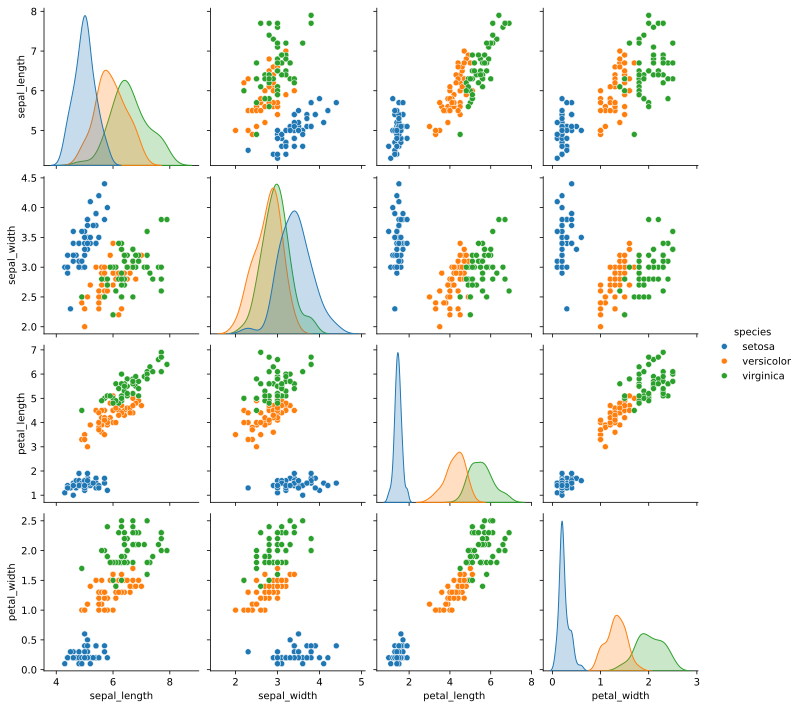

In [ ]:
sns.pairplot(iris,hue = 'species')
plt.show()

In [ ]:
data = iris[iris.columns[0:4]]
data_tensor = torch.tensor(data.values).float()#reshape(1,150,4)
print("training data:")
print(data.head(2))
print(data_tensor.shape)
print(data_tensor[0:2])

#data_labels = iris[iris.columns[-1]]
#data_labels_encoded = pd.get_dummies(data_labels, columns=['species'], prefix='species').astype(int)
#print(data_labels_encoded.iloc[45:55])
print("\nlabels:")
labels = torch.zeros(len(data),dtype=torch.long) #setosa is 0
labels[iris["species"]=="versicolor"] = 1
labels[iris["species"]=="virginica"] = 2
labels #data must be randomized to avoid introducign systemic bias

training data:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
torch.Size([150, 4])
tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000]])

labels:


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [ ]:
iris_model = nn.Sequential(nn.Linear(4,64),
                           nn.ReLU(),
                           nn.Linear(64,64),
                           nn.ReLU(),
                           nn.Linear(64,3))


learning_rate = 0.01
loss_fun = nn.CrossEntropyLoss()#computes log softmax #https://docs.pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
optimizer = torch.optim.SGD(iris_model.parameters(),lr = learning_rate)

iris_model

Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
)

In [ ]:
#training
epochs = 1000
loss_consolidated = torch.zeros(epochs)
#loss_consolidated2 = np.zeros(epochs)
ongoing_acc = []

for epochi in range(epochs):
  pred = iris_model(data_tensor)
  loss = loss_fun(pred,labels)
  loss_consolidated[epochi] = loss
  #loss_consolidated2[epochi] = loss

  optimizer.zero_grad() #initialize all gradients to 0
  loss.backward() #backprop based on losses
  optimizer.step() #housekeeping functions of SGD

  #compute accuracy
  matches = torch.argmax(pred,axis=1)==labels
  matches_numeric = matches.float()
  accuracy_pct = 100*torch.mean(matches_numeric)
  ongoing_acc.append(accuracy_pct)

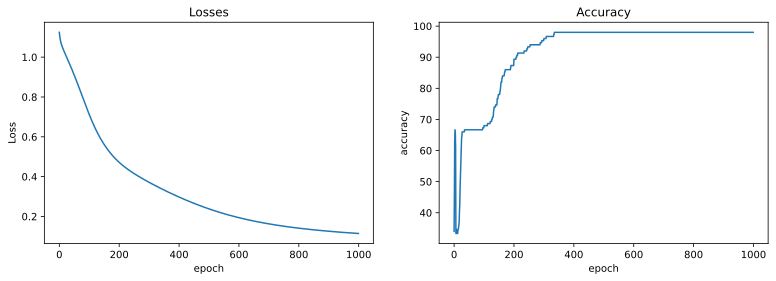

In [ ]:
# report accuracy
fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(loss_consolidated.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoing_acc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [ ]:
pred.shape

torch.Size([150, 3])

In [ ]:
pred = iris_model(data_tensor)
pred[0:5]

tensor([[  8.1731,   2.9079, -11.7634],
        [  7.0846,   2.7636, -10.5202],
        [  7.4707,   2.6952, -10.8021],
        [  6.7798,   2.6345, -10.0729],
        [  8.2464,   2.8788, -11.7978]], grad_fn=<SliceBackward0>)

In [ ]:
torch.sum(pred,axis=1)[0:5]

tensor([-0.6823, -0.6719, -0.6361, -0.6584, -0.6725], grad_fn=<SliceBackward0>)

In [ ]:
sm = nn.Softmax()
torch.sum(sm(pred),axis=1)[0:5]

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SliceBackward0>)

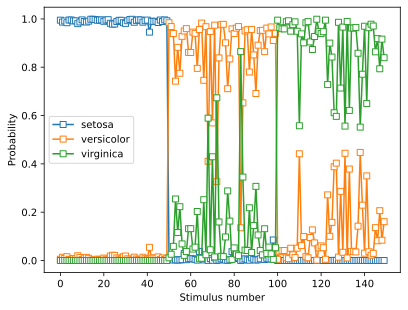

In [ ]:
plt.plot(sm(pred.detach()),'s-',markerfacecolor = 'w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(["setosa","versicolor","virginica"])
plt.show()

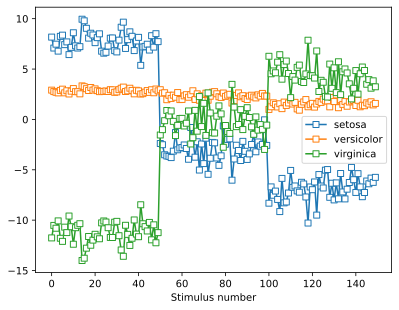

In [ ]:
plt.plot((pred.detach()),'s-',markerfacecolor = 'w')
plt.xlabel('Stimulus number')
plt.legend(["setosa","versicolor","virginica"])
plt.show()
#softmax is essential

##Cross entropy loss calculation

In [ ]:
y = torch.tensor([[1,0,0]],dtype=torch.float64).float() #labels
z = torch.tensor([[2.0,-1.0,0.1]]).float() #neural network output

In [ ]:
loss = nn.CrossEntropyLoss()
loss(z,y) #loss is low because model predictions are good

tensor(0.1818)

In [ ]:
torch.softmax(z,dim=1) #exp(2)/sum(exp(zi))

tensor([[0.8338, 0.0415, 0.1247]])

In [ ]:
-1*np.log(0.8338) #calculating cross entropy loss #matches with loss function

np.float64(0.18176171353544054)

In [ ]:
torch.max(z,dim=1)#alternative of argmax.The indices gives us the label

torch.return_types.max(
values=tensor([2.]),
indices=tensor([0]))

##Binary cross entropy loss calculation

- uses sigmoid instead of softmax
- averages value

In [ ]:
# Apply sigmoid to z
sigmoid_z = torch.sigmoid(z)
print("Sigmoid of z:", sigmoid_z)

# Manual calculation of BCE
# BCE = - [y * log(sigmoid(z)) + (1 - y) * log(1 - sigmoid(z))]
manual_loss = - (y * torch.log(sigmoid_z) + (1 - y) * torch.log(1 - sigmoid_z))
print("Manual BCE loss (element-wise):", manual_loss)

# The BCELoss function averages the loss over all elements
mean_manual_loss = torch.mean(manual_loss) #not done in cross entropy for multiclass
print("Mean manual BCE loss:", mean_manual_loss)

# Compare with nn.BCELoss() output
loss_fn = nn.BCELoss()
nn_bce_loss = loss_fn(sigmoid_z, y) # Note: BCELoss expects sigmoid output
print("nn.BCELoss output:", nn_bce_loss)

Sigmoid of z: tensor([[0.8808, 0.2689, 0.5250]])
Manual BCE loss (element-wise): tensor([[0.1269, 0.3133, 0.7444]])
Mean manual BCE loss: tensor(0.3949)
nn.BCELoss output: tensor(0.3949)


#Classification (3 categories)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

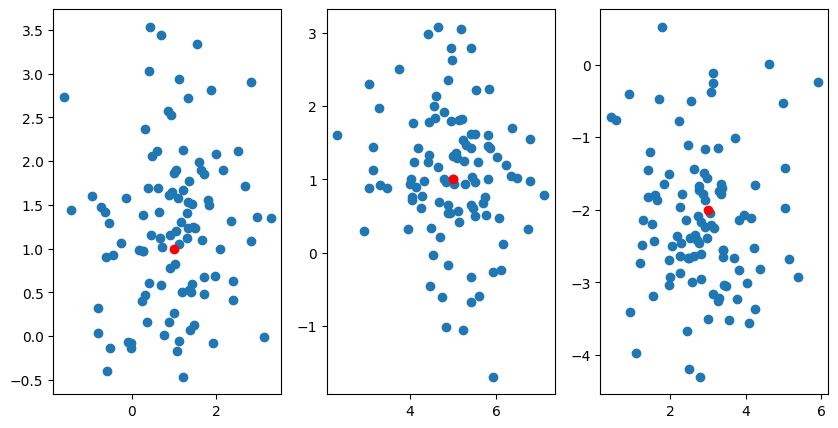

In [ ]:
#create data
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]
C = [3,-2]

a = [A[0] + np.random.randn (nPerClust)*blur,A[1] + np.random.randn (nPerClust)*blur]
b = [B[0] + np.random.randn (nPerClust)*blur,B[1] + np.random.randn (nPerClust)*blur]
c = [C[0] + np.random.randn (nPerClust)*blur,C[1] + np.random.randn (nPerClust)*blur]


## true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

#concatenate into matrix
data_np = np.hstack((a,b,c)).T

##convert to a pytorch tensor
data = torch.tensor(data_np).float()
#labels = torch.tensor(labels_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

fig,ax = plt.subplots(1,3,figsize = [10,5])
ax[0].scatter(a[0],a[1])
ax[0].plot(A[0],A[1],'ro')
ax[1].scatter(b[0],b[1])
ax[1].plot(B[0],B[1],'ro')
ax[2].scatter(c[0],c[1])
ax[2].plot(C[0],C[1],'ro')

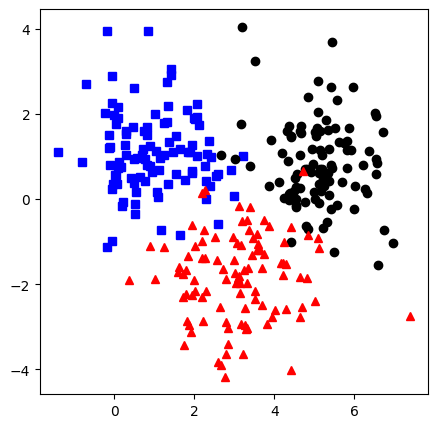

In [ ]:
fig = plt.figure(figsize = (5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],"bs")
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],"ko")
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],"r^")

torch.Size([300, 2])
torch.Size([300, 3])
torch.Size([300])
Final accuracy: 94.6667%


Text(0.5, 1.0, 'Accuracy')

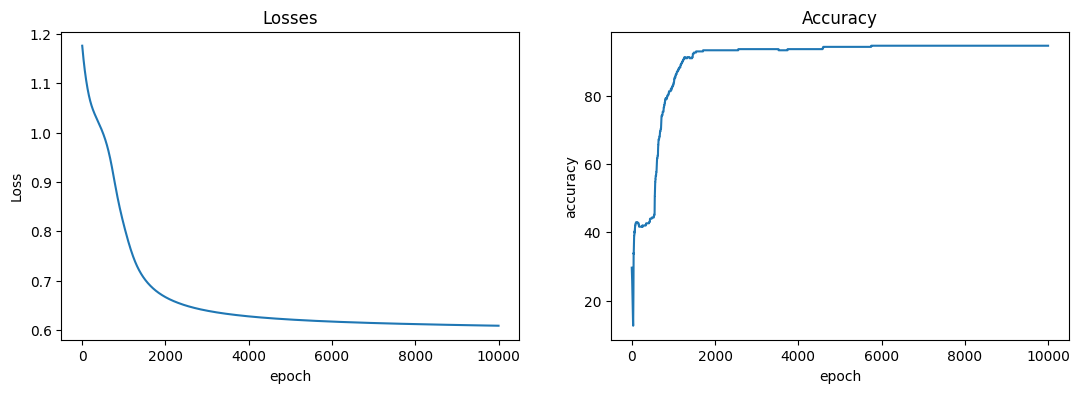

In [ ]:
##initialize model
ANNq = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,3),
    nn.Softmax(dim = 1)
)

lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNq.parameters(),lr = 0.01)

#test data
yhat = ANNq(data)
print(data.shape)
print(yhat.shape)
print(labels.shape)

## training model
numepochs = 10000

losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):
  yhat = ANNq(data)
  # Correct the labels tensor format for CrossEntropyLoss
  loss = lossfun(yhat,labels)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #compute accuracy
  matches = torch.argmax(yhat,axis = 1) == labels
  matchesNumeric = matches.float()
  accuracyPct = 100*torch.mean(matchesNumeric)
  ongoingAcc.append(accuracyPct)

#final forward pass
predictions = ANNq(data)
predlabels = torch.argmax(predictions,axis = 1)
totalacc = 100*torch.mean((predlabels == labels).float())

#visualizing results
print("Final accuracy: %g%%"%totalacc)

fig,ax = plt.subplots(1,2,figsize = (13,4))
ax[0].plot(losses.detach())
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("epoch")
ax[0].set_title("Losses")

ax[1].plot(ongoingAcc)
ax[1].set_ylabel("accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_title("Accuracy")

In [ ]:
print("recreate cross entropy loss calculation")
print(data[-1])
print(yhat[-1])
print(labels[-1])
print(loss)

recreate cross entropy loss calculation
tensor([ 5.0413, -1.4226])
tensor([1.0674e-03, 4.6970e-05, 9.9889e-01], grad_fn=<SelectBackward0>)
tensor(2)
tensor(0.8569, grad_fn=<NllLossBackward0>)


In [ ]:
torch.sum(yhat,axis = 1) #confirm that these should sum to 1

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

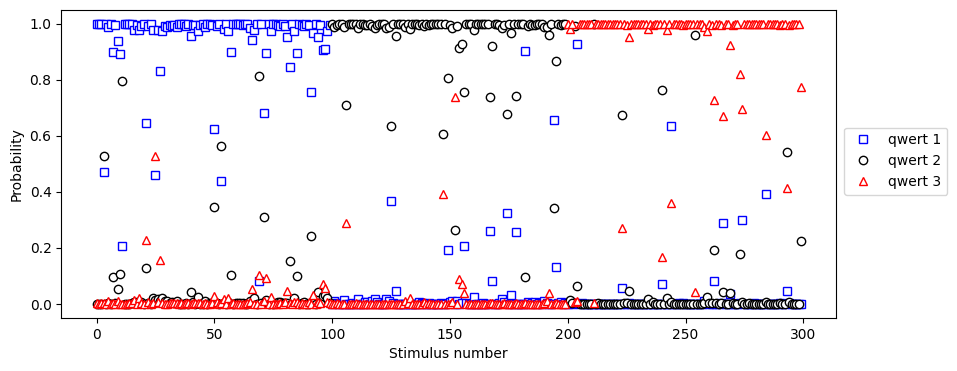

In [ ]:
fig = plt.figure(figsize = (10,4))

colorshape = ['bs','ko','r^']
for i in range(3):
  plt.plot(yhat[:,i].detach(),colorshape[i],markerfacecolor = 'w')

plt.xlabel("Stimulus number")
plt.ylabel("Probability")
plt.legend(['qwert 1','qwert 2','qwert 3'],loc =(1.01,0.4))
plt.show()

#Parametric Experiments to identify network width

In [ ]:
#shallow neural network with 1 hidden layer : 4 inputs, 3 outputs, n nodes in hidden layer

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import dataset
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print(iris.shape)
iris.describe()
iris.info()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


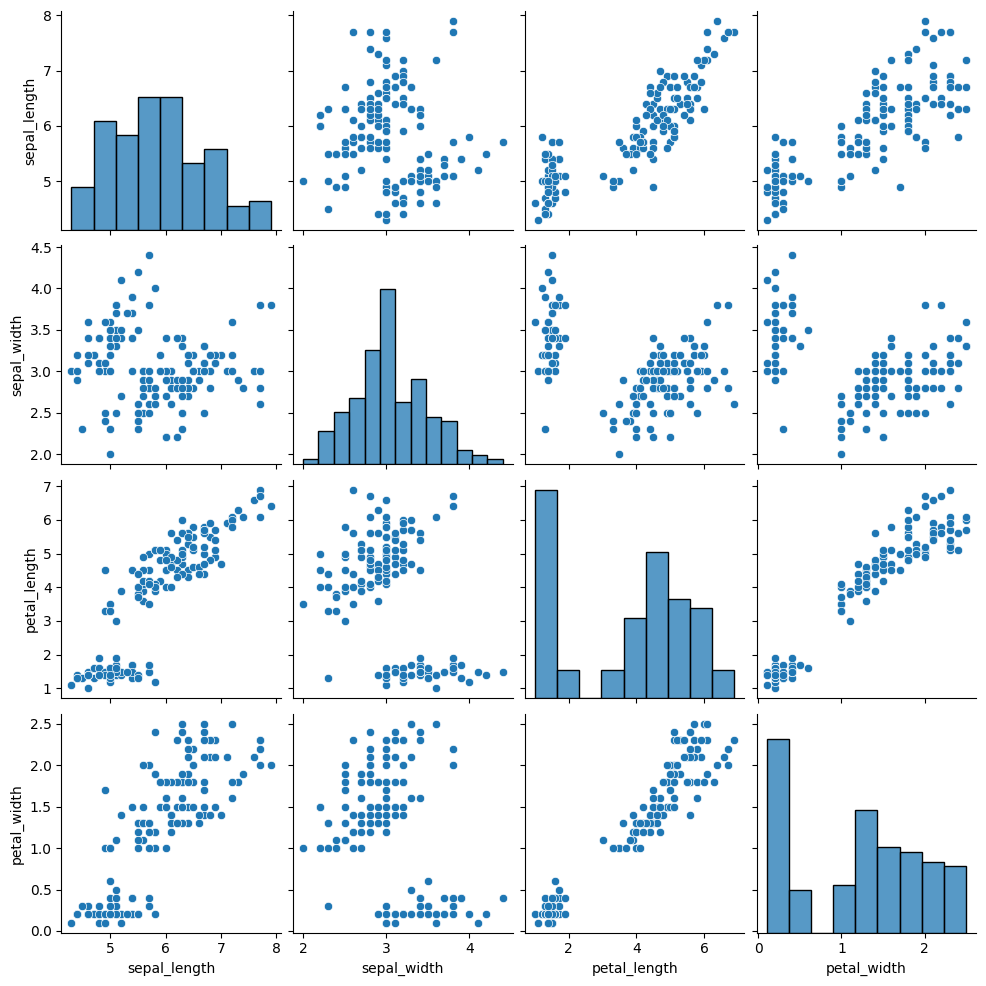

In [ ]:
sns.pairplot(iris)

In [ ]:
#convert dataset from pandas to torch
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data),dtype = torch.long)
labels [ iris["species"]=="versicolor"] = 1
labels [ iris["species"]=="virginica"] = 2

In [ ]:
iris[["species"]].drop_duplicates()

,species
0,setosa
50,versicolor
100,virginica


In [ ]:
def model(n):
  """shallow neural network with n hidden layers """

  model = nn.Sequential(
    nn.Linear(4,n), # input layer
    nn.ReLU(),      # activation unit
    nn.Linear(n,n), # hidden layer with n nodes
    nn.ReLU(),      # activation unit
    nn.Linear(n,3)  # output layer
    )

  return model

In [ ]:
def train(n):
  shallow = model(n)
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(shallow.parameters(),lr = 0.01)

  numepochs = 1000

  for epochi in range(numepochs):
    yhat = shallow(data)
    loss = lossfun(yhat,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = shallow(data)
  #labels2 = torch.tensor([predictions[i].argmax().item() for i in range(len(predictions))],dtype = torch.long)
  labels2 = torch.argmax(predictions,axis = 1)
  accuracy1 = sum(labels2 == labels)/len(labels)
  accuracy2 = torch.mean((labels2 == labels).float())

  return accuracy1,accuracy2

/usr/local/lib/python3.12/dist-packages/torch/nn/init.py:566: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


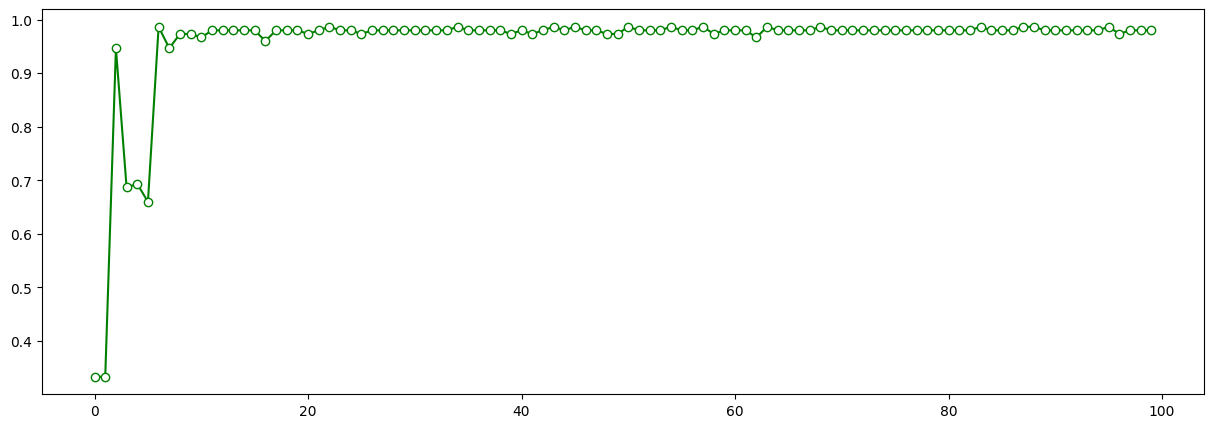

In [ ]:
accuracy1 = []
accuracy2 = []
for i in range(100):
  a1,a2 = train(i)
  accuracy1.append(a1)
  accuracy2.append(a2)

figure = plt.subplots(1,figsize = (15,5))
plt.plot(accuracy2,'go-',markerfacecolor ="w")

#Width vs Depth

In [ ]:
#Width = no. of nodes in each layer
#depth = no. of hidden layers
#Deep model vs wide model : wide model has higher width
#Wide model with less depth 2 input nodes + 4 hidden nodes(1 hidden layer) + 3 output (total nodes = 7): traininable parameters are 12 + 15 = 27
#Deep model with less width  2 input nodes + 2 (hidden layer 1) + 2 (hidden layer 2) + 3 output (total nodes = 7): trainable parameters are 6 + 6 + 9 = 21
#Deep models can capture more complex/abstract representations. This is interesting especially considering that they have fewer trainable parameters

In [ ]:
widenet = nn.Sequential(
    nn.Linear(2,4,bias = True), #hidden layer
    #nn.ReLU(),
    nn.Linear(4,3,bias = True)  #output layer
)

deepnet = nn.Sequential(
    nn.Linear(2,2,bias = True), #hidden layer #initializes a matrix of weights from input to hidden layer
    #nn.ReLU(),
    nn.Linear(2,2,bias = True), #hidden layer
    #nn.ReLU(),
    nn.Linear(2,3,bias = True) #output layer
)

print(widenet)
print(deepnet)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


In [ ]:
print("\033[1mWidenet parameters :\033[0m \n")
for p in widenet.named_parameters():
  print(p)
  print()

print("\033[1mDeepnet parameters :\033[0m \n")
for p in deepnet.named_parameters():
  print(p)
  print()

Widenet parameters : 

('0.weight', Parameter containing:
tensor([[-0.1805, -0.6292],
        [ 0.2050, -0.0396],
        [-0.0489, -0.2496],
        [-0.7066,  0.1842]], requires_grad=True))

('0.bias', Parameter containing:
tensor([-0.0932, -0.1949, -0.2453,  0.3109], requires_grad=True))

('1.weight', Parameter containing:
tensor([[-0.0079,  0.3831, -0.1643,  0.0411],
        [-0.0043,  0.4689, -0.0390, -0.0025],
        [-0.3993, -0.4961,  0.2034, -0.2364]], requires_grad=True))

('1.bias', Parameter containing:
tensor([ 0.2107, -0.2436, -0.3692], requires_grad=True))

Deepnet parameters : 

('0.weight', Parameter containing:
tensor([[ 0.5778, -0.1101],
        [ 0.5671, -0.3187]], requires_grad=True))

('0.bias', Parameter containing:
tensor([ 0.0459, -0.5699], requires_grad=True))

('1.weight', Parameter containing:
tensor([[-0.0533, -0.4656],
        [ 0.5863,  0.1092]], requires_grad=True))

('1.bias', Parameter containing:
tensor([ 0.5314, -0.3739], requires_grad=True))

('2.w

In [ ]:
deepnet[0].weight
deepnet[2].weight

Parameter containing:
tensor([[ 0.1644, -0.4766],
        [ 0.6797,  0.5570],
        [ 0.3767,  0.1367]], requires_grad=True)

In [ ]:
#counting the number of nodes (by counting the biases)
def total_nodes(module):
  nodes = 0
  for p in module.named_parameters():
    if "bias" in p[0]:
      nodes += len(p[1])
  return nodes

print("total nodes in widenet =",total_nodes(widenet))
print("total nodes in deepnet =",total_nodes(deepnet))


total nodes in widenet = 7
total nodes in deepnet = 7


In [ ]:
for p in widenet.parameters():
  print(p)

print(widenet[0].bias)

Parameter containing:
tensor([[ 0.4110,  0.6821],
        [ 0.2666, -0.0792],
        [-0.1572,  0.1201],
        [-0.3448,  0.6296]], requires_grad=True)
Parameter containing:
tensor([-0.2603, -0.3315, -0.0088, -0.0941], requires_grad=True)
Parameter containing:
tensor([[ 0.2878,  0.3289, -0.2870,  0.3288],
        [-0.3119, -0.2048,  0.1746,  0.3579],
        [ 0.2536, -0.3591, -0.0181,  0.2448]], requires_grad=True)
Parameter containing:
tensor([-0.2419, -0.2506, -0.1057], requires_grad=True)
Parameter containing:
tensor([-0.2603, -0.3315, -0.0088, -0.0941], requires_grad=True)


In [ ]:
#counting total number of trainable parameters
def total_params(model):
  params = 0
  for p in model.named_parameters():
    if p[1].requires_grad:
      params += p[1].numel() #do not use len for matrices. Len here will give you only the row counts
  return params

print("total parameters in widenet are :", total_params(widenet))
print("total parameters in deepnet are :", total_params(deepnet))

total parameters in widenet are : 27
total parameters in deepnet are : 21


In [ ]:
type(widenet[0].weight)

torch.nn.parameter.Parameter

In [ ]:
from torchsummary import summary
summary(widenet,(1,2)) #model, size of input data matrix

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 4]              12
            Linear-2                 [-1, 1, 3]              15
Total params: 27
Trainable params: 27
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


#nn.Sequential vs Custom classes

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [80]:
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

# generate data
a = [ A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur]
b = [ B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

#convert to pytorch tensor
labels = torch.tensor(labels_np).float()
data = torch.tensor(data_np).float()

In [85]:
print(data_np.shape)
print(labels_np.shape)
print(type(data_np))
print()
print(data.shape)
print(type(data))

(200, 2)
(200, 1)
<class 'numpy.ndarray'>

torch.Size([200, 2])
<class 'torch.Tensor'>


In [90]:
class myANNclass(nn.Module):
  def __init__(self):
    super().__init__()

    ## input layer
    self.input = nn.Linear(2,1)

    ## output layer
    self.output = nn.Linear(1,1)

  #forward pass
  def forward(self,x):

    #pass through the input layer
    x = self.input(x)

    # apply relu
    x = F.relu(x) #calling relu function instead of the ReLU class

    #output layer
    x = self.output(x)
    x = torch.sigmoid(x)

    return x



myANNclass(
  (input): Linear(in_features=2, out_features=1, bias=True)
  (output): Linear(in_features=1, out_features=1, bias=True)
)


myANNclass(
  (input): Linear(in_features=2, out_features=1, bias=True)
  (output): Linear(in_features=1, out_features=1, bias=True)
)

model accuracy


tensor(96.)

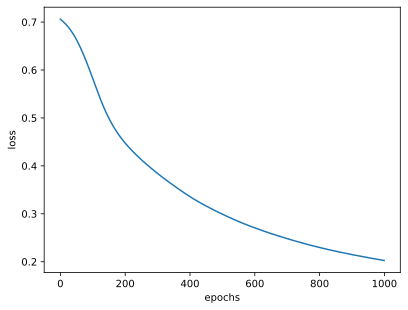

In [130]:
## creating an instance of ANNclass
ANNclassify = myANNclass()
print(ANNclassify)

lr = 0.01
lossfun = nn.BCELoss()
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = lr)


#training
numepochs = 1000
losses = torch.tensor(np.zeros(numepochs))

for epochi in range(numepochs):
  yhat = ANNclassify(data)
  loss = lossfun(yhat,labels)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(losses.detach())
plt.xlabel("epochs")
plt.ylabel("loss")

print("\nmodel accuracy")
predictions = ANNclassify(data) #probabilities
predlabels = predictions >0.5 #translating probabilities into labels
torch.mean((predlabels==labels).float())*100 ##accuracy

#Depth vs breadth 2

#e^(3+4i)t

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [ ]:
def y(a,t):
  return np.exp((3 +a*1j)*t)

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


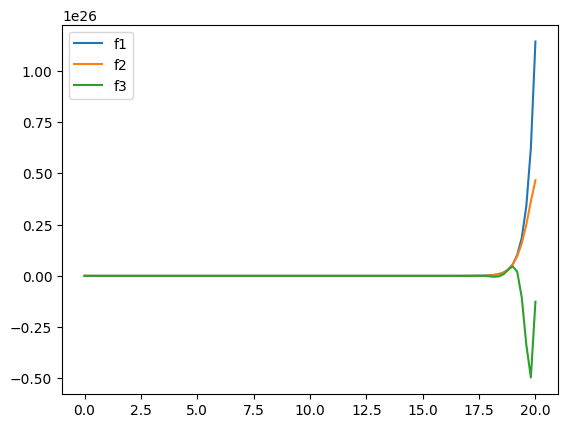

In [ ]:
t = np.linspace(0,20,100)
f1 = y(0,t)
f2 = y(1,t)
f3 = y(4,t)
plt.plot(t,f1,label = "f1")
plt.plot(t,f2,label = "f2")
plt.plot(t,f3,label = "f3")
plt.legend()

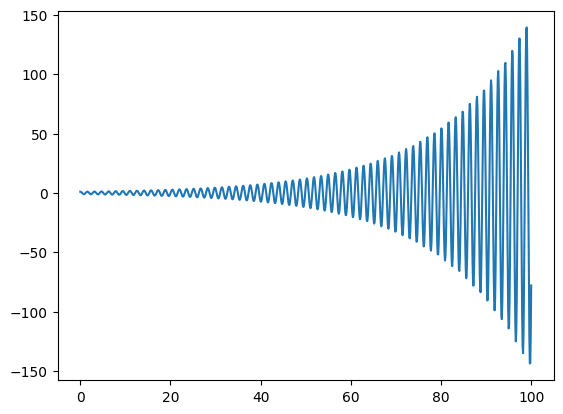

In [ ]:
def y(t):
  return np.exp(0.05*t)*np.cos(4*t)
t = np.linspace(0,100,1000)
f1 = y(t)
plt.plot(t,f1,label = "f1")

In [ ]:
import cmath # cmath module provides mathematical functions for complex numbers

# Representing an imaginary number
imaginary_unit = 1j
print(f"Imaginary unit: {imaginary_unit}")
print(f"Type of imaginary unit: {type(imaginary_unit)}")

# Creating a complex number with a real and imaginary part
complex_num = 3 + 4j
print(f"Complex number: {complex_num}")
print(f"Real part: {complex_num.real}")
print(f"Imaginary part: {complex_num.imag}")

# Operations with complex numbers
sum_complex = complex_num + (2 - 1j)
print(f"Sum: {sum_complex}")

product_complex = complex_num * (2j)
print(f"Product: {product_complex}")

# You can also use cmath for functions like square root of a negative number
negative_sqrt = cmath.sqrt(-9)
print(f"Square root of -9: {negative_sqrt}")

Imaginary unit: 1j
Type of imaginary unit: <class 'complex'>
Complex number: (3+4j)
Real part: 3.0
Imaginary part: 4.0
Sum: (5+3j)
Product: (-8+6j)
Square root of -9: 3j


Key points:
*   Python's built-in `complex` type handles imaginary numbers.
*   The imaginary unit is denoted by `j` (or `J`), not `i`.
*   `complex_num.real` and `complex_num.imag` attributes give you the real and imaginary components, respectively.

#Concepts

Separating hyperplane
- is a boundary that binarises and categorises data.
- It is used as a decision boundary

Feature space
- is a graphical representation where,
- each axis is a dimension of the data,
- and each point (scatter point) represents input data values

Backpropagation
- error signal needs to propagate backward through each node
- back propagation is just gradient descent
- chain rule of derivatives is used
- x-axis is now the weights axis
- its essentially gradient descent in multi dimensions

Hyperparameter Tuning
- Learning rate (step size) vs. Training epochs(iterations)

## Code review

###argmax with axis

In [ ]:
import torch

# Example yhat tensor: (batch_size, num_classes) -> (3 samples, 4 classes)
# Each row represents a sample, and columns are scores/logits for each class.
yhat = torch.tensor([
    [0.1, 0.7, 0.2, 0.0], # Sample 0: class 1 is highest
    [0.9, 0.05, 0.03, 0.02], # Sample 1: class 0 is highest
    [0.1, 0.2, 0.6, 0.1]  # Sample 2: class 2 is highest
])

print("Original yhat tensor shape:", yhat.shape)
print("Original yhat tensor:\n", yhat)

Original yhat tensor shape: torch.Size([3, 4])
Original yhat tensor:
 tensor([[0.1000, 0.7000, 0.2000, 0.0000],
        [0.9000, 0.0500, 0.0300, 0.0200],
        [0.1000, 0.2000, 0.6000, 0.1000]])


In [ ]:
argmax_no_axis = torch.argmax(yhat)

print("torch.argmax(yhat):")
print(f"Result: {argmax_no_axis}")
print(f"Shape: {argmax_no_axis.shape}")
print("Explanation: The maximum value (0.9) is at index 4 in the flattened tensor (0.1, 0.7, 0.2, 0.0, **0.9**, 0.05, 0.03, 0.02, 0.1, 0.2, 0.6, 0.1)")

torch.argmax(yhat):
Result: 4
Shape: torch.Size([])
Explanation: The maximum value (0.9) is at index 4 in the flattened tensor (0.1, 0.7, 0.2, 0.0, **0.9**, 0.05, 0.03, 0.02, 0.1, 0.2, 0.6, 0.1)


In [ ]:
import torch

# Re-using the example yhat tensor from before
yhat = torch.tensor([
    [0.1, 0.7, 0.2, 0.0], # Sample 0: class 1 is highest
    [0.9, 0.05, 0.03, 0.02], # Sample 1: class 0 is highest
    [0.1, 0.2, 0.6, 0.1]  # Sample 2: class 2 is highest
])

print("Original yhat tensor shape:", yhat.shape)
print("Original yhat tensor:\n", yhat)

### 1. `torch.argmax(yhat, axis = 0)`

When `axis = 0` (the first dimension, usually representing samples or batch size), `torch.argmax()` finds the maximum value along that dimension. This means it will compare elements *vertically* (down the columns) and return the *row index* where the maximum was found for each column. The output tensor will have a shape corresponding to the number of classes.

For `(batch_size, num_classes)`, `axis=0` will return an index for each class, telling you which sample had the highest score for *that specific class*.

This is generally **not** what you want for per-sample class prediction, but it can be useful in other analytical contexts.

In [ ]:
argmax_axis_0 = torch.argmax(yhat, axis=0)

print("torch.argmax(yhat, axis=0):")
print(f"Result: {argmax_axis_0}")
print(f"Shape: {argmax_axis_0.shape}")
print("Explanation:")
print("  - For Class 0 (first column): max is 0.9 at row index 1")
print("  - For Class 1 (second column): max is 0.7 at row index 0")
print("  - For Class 2 (third column): max is 0.6 at row index 2")
print("  - For Class 3 (fourth column): max is 0.1 at row index 2")

torch.argmax(yhat, axis=0):
Result: tensor([1, 0, 2, 2])
Shape: torch.Size([4])
Explanation:
  - For Class 0 (first column): max is 0.9 at row index 1
  - For Class 1 (second column): max is 0.7 at row index 0
  - For Class 2 (third column): max is 0.6 at row index 2
  - For Class 3 (fourth column): max is 0.1 at row index 2


### 2. `torch.argmax(yhat, axis = 1)`

When `axis = 1` (the second dimension, usually representing classes), `torch.argmax()` finds the maximum value along that dimension. This means it will compare elements *horizontally* (across the rows) and return the *column index* (i.e., the class index) where the maximum was found for each row. The output tensor will have a shape corresponding to the batch size.

For `(batch_size, num_classes)`, `axis=1` will return a single index for each sample, indicating the predicted class for that sample. **This is typically the correct and most common way to get class predictions for a batch in multi-class classification.**

In [ ]:
argmax_axis_1 = torch.argmax(yhat, axis=1)

print("torch.argmax(yhat, axis=1):")
print(f"Result: {argmax_axis_1}")
print(f"Shape: {argmax_axis_1.shape}")
print("Explanation:")
print("  - For Sample 0 (first row): max is 0.7 at class index 1")
print("  - For Sample 1 (second row): max is 0.9 at class index 0")
print("  - For Sample 2 (third row): max is 0.6 at class index 2")

torch.argmax(yhat, axis=1):
Result: tensor([1, 0, 2])
Shape: torch.Size([3])
Explanation:
  - For Sample 0 (first row): max is 0.7 at class index 1
  - For Sample 1 (second row): max is 0.9 at class index 0
  - For Sample 2 (third row): max is 0.6 at class index 2


###squeeze

In [ ]:
import torch

# Create a tensor with singleton dimensions
tensor_a = torch.zeros(1, 10, 1, 5, 1)
print(f"Original tensor shape: {tensor_a.shape}")

# Squeeze the tensor
tensor_b = tensor_a.squeeze()
print(f"Squeezed tensor shape (all singleton dimensions removed): {tensor_b.shape}")

# Squeeze a specific dimension (e.g., dimension 2, which is the 3rd dimension)
tensor_c = tensor_a.squeeze(2)
print(f"Squeezed tensor shape (dimension 2 removed): {tensor_c.shape}")

# If a dimension is not a singleton, squeeze will not affect it
tensor_d = torch.zeros(2, 3, 1, 4)
print(f"\nOriginal tensor_d shape: {tensor_d.shape}")
tensor_e = tensor_d.squeeze(0) # dimension 0 has size 2, not 1
print(f"Squeezed tensor_d shape (dimension 0 not removed): {tensor_e.shape}")
tensor_f = tensor_d.squeeze(2) # dimension 2 has size 1
print(f"Squeezed tensor_d shape (dimension 2 removed): {tensor_f.shape}")

Original tensor shape: torch.Size([1, 10, 1, 5, 1])
Squeezed tensor shape (all singleton dimensions removed): torch.Size([10, 5])
Squeezed tensor shape (dimension 2 removed): torch.Size([1, 10, 5, 1])

Original tensor_d shape: torch.Size([2, 3, 1, 4])
Squeezed tensor_d shape (dimension 0 not removed): torch.Size([2, 3, 1, 4])
Squeezed tensor_d shape (dimension 2 removed): torch.Size([2, 3, 4])
